In [2]:
#Importando Libreras
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import community
from networkx.algorithms.community import greedy_modularity_communities

In [58]:
# Leer información de Nodos 
nodos = pd.read_excel('Datos/Nodos.xlsx', sheet_name='Hoja1')
nodos.head(2)

,Id,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,1.257677e+10,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN
1,Warburg Pincus,"New York, New York, United States",Active,NaN,433.0,286.0,22.0,131.0,NaN,NaN,...,3.802820e+07,USD,3.802820e+07,NaN,34.635,"34,033.67",392.0,53801.0,USD,53801.0


In [59]:
# Lerr información de Arcos 
arcos =pd.read_excel('Datos/Arcos.xlsx', sheet_name='Arcos')
arcos.head()


,Source,Target
0,01 Advisors,Electric
1,01 Advisors,Origin
2,17Capital LLP,NewSpring
3,1kx,Arweave
4,1kx,Rarible


In [86]:
lista_arcos = list(zip(arcos['Source'], arcos['Target']))
lista_nodos = nodos['Id'].to_list()

print(lista_arcos[0])
print(lista_nodos[0])

def ordenar_diccionario_desc(diccionario):
    sorted(diccionario.items(), key=lambda x: x[1], reverse=True)
    return diccionario

def nodos_desconectado(red):
    no_entradas_no_salidas = [nodo for nodo in red.nodes() if red.in_degree(nodo) == 0 and red.out_degree(nodo) == 0]
    return len(no_entradas_no_salidas)



('01 Advisors', 'Electric')
Tencent


In [94]:
H = nx.DiGraph()
H.add_nodes_from(lista_nodos)
H.add_edges_from(lista_arcos)
print(f'Nodos: {H.number_of_nodes()}')
print(f'Arcos: {H.number_of_edges()}')
densidad_dirigida=nx.number_of_edges(H)/(nx.number_of_nodes(H)*(nx.number_of_nodes(H)-1))
print(f'Densidad: {densidad_dirigida}')
print(f'Reciprocidad: {nx.reciprocity(H)}')
print(f'Transitividad: {nx.transitivity(H)}')
print(f'Betweenness Centrality: {ordenar_diccionario_desc(nx.betweenness_centrality(H))}')
print(f'PageRank: {ordenar_diccionario_desc(nx.pagerank(H))}')
print(f'Clustering Coefficient: {ordenar_diccionario_desc(nx.clustering(H))}')
print(f'Red completamente conectada: {nx.is_connected(H.to_undirected())}')
print(f'Nodos no conectados: {nodos_desconectado(H)}')
print(f'Componentes conectados: {nx.number_connected_components(H.to_undirected())}')



Nodos: 2218
Arcos: 4187
Densidad: 0.000851482498750332
Reciprocidad: 0.0014330069262001434
Transitividad: 0.0013581459862451598
Betweenness Centrality: {'Tencent': 7.398930808700084e-05, 'Warburg Pincus': 0.0, 'Twitter': 0.0, 'Ubisoft': 4.3966136304792796e-05, 'WeWork': 0.0, 'Wagestream': 0.0, 'Xendit': 0.0, 'Techstars': 1.8522770387667335e-05, 'StartEngine': 0.0, 'Verizon': 0.0, 'Terra': 0.0, 'Wyre': 0.0, 'Zomato': 5.8010874291046055e-06, 'SpaceX': 0.0, 'Twitch': 0.0, 'SAP': 2.4425631280440442e-06, 'Wefunder': 7.12414245679513e-07, 'Swiggy': 5.292220110762096e-06, 'Tive': 0.0, 'Stanza Living': 0.0, 'Twilio': 2.035469273370037e-06, 'UrbanPiper': 0.0, 'Tesla': 0.0, 'Zilingo': 0.0, 'Xiaohongshu': 0.0, 'Uniphore': 0.0, 'Sonos': 0.0, 'Sanofi': 0.0, 'Thunes': 0.0, 'Turo': 0.0, 'Treinta': 0.0, 'Zume': 0.0, 'Yieldstreet': 0.0, 'Yokoy': 0.0, 'Solana': 0.0, 'Samsung Electronics': 0.0, 'Shopify': 3.867391619403071e-06, 'Whatfix': 0.0, 'Trace': 0.0, 'Yandex': 0.0, 'Vytalize Health': 0.0, 'Sophos'

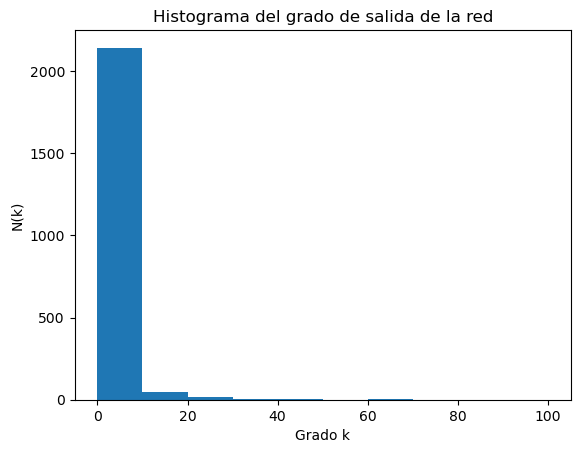

In [96]:
a=plt.hist(dict(H.out_degree()).values())
plt.title('Histograma del grado de salida de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

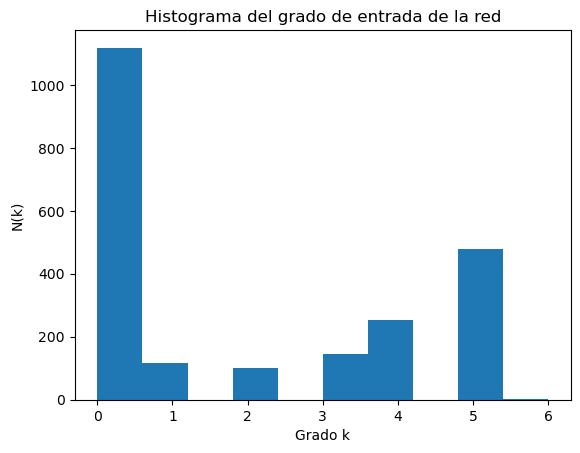

In [98]:
a=plt.hist(dict(H.in_degree()).values())
plt.title('Histograma del grado de entrada de la red')
plt.xlabel ("Grado k")
plt.ylabel ("N(k)")
plt.show()

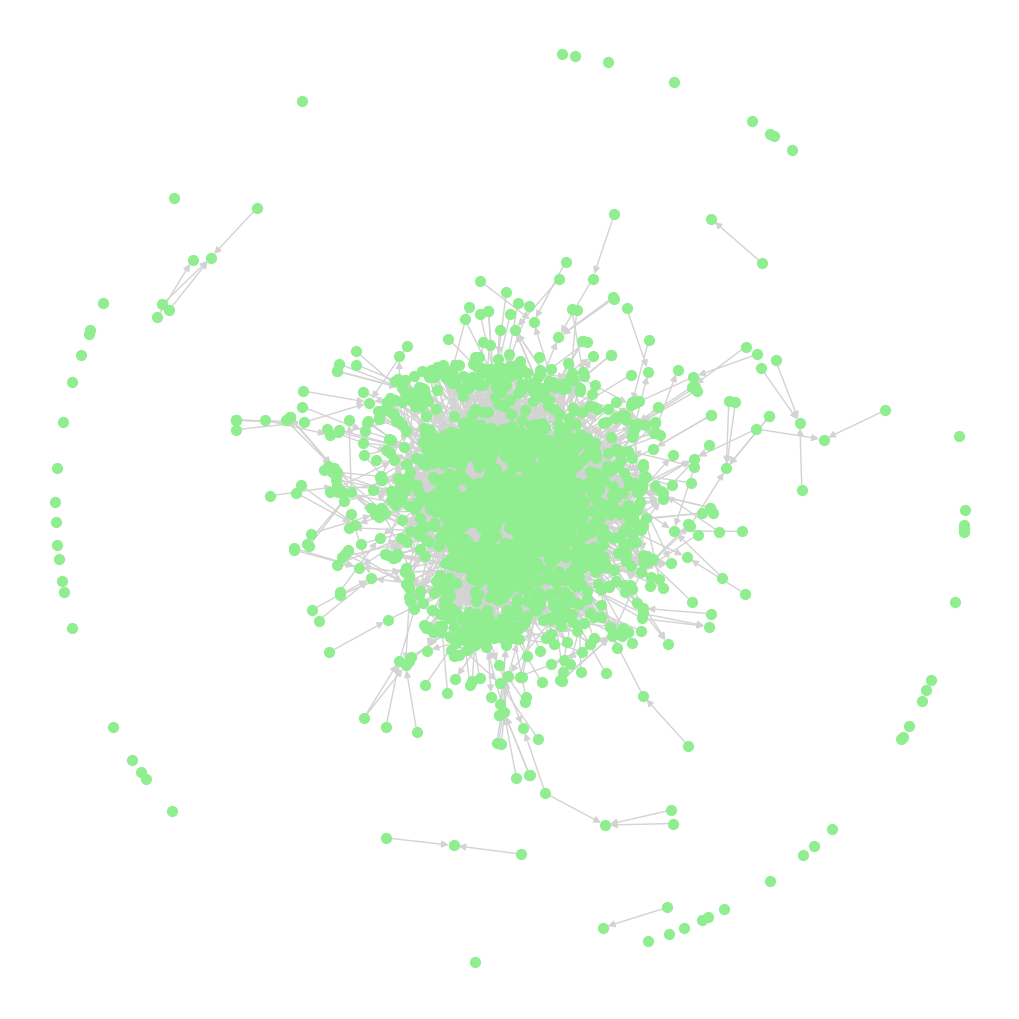

In [44]:
# Dimensionar la gráfica
fig=plt.figure(figsize=(10,10))

# Generar la gráfica
nx.draw_kamada_kawai(H, node_size=50, node_color='lightgreen', edge_color='lightgray')

In [51]:
N = H.to_undirected()
partition = community.best_partition(N)
values = [partition.get(node) for node in N.nodes()]
print(f'Número de comunidades: {len(set(values))}')


Número de comunidades: 91


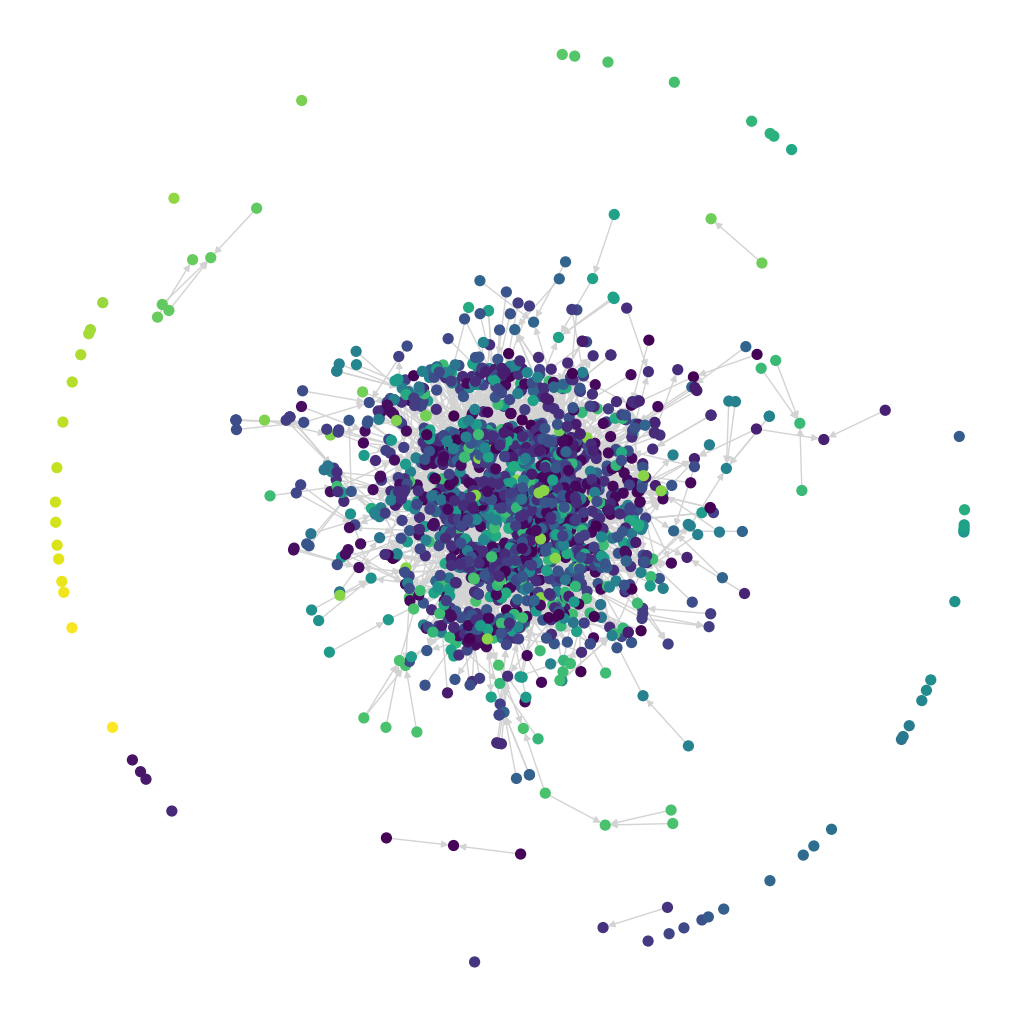

In [53]:
# Dimencionar gráfica
plt.figure(figsize=(10,10))

# Graficar la red con los colores de cada nodo representando las comunidades
nx.draw_kamada_kawai(H,node_color = values, node_size=50, edge_color='lightgray')